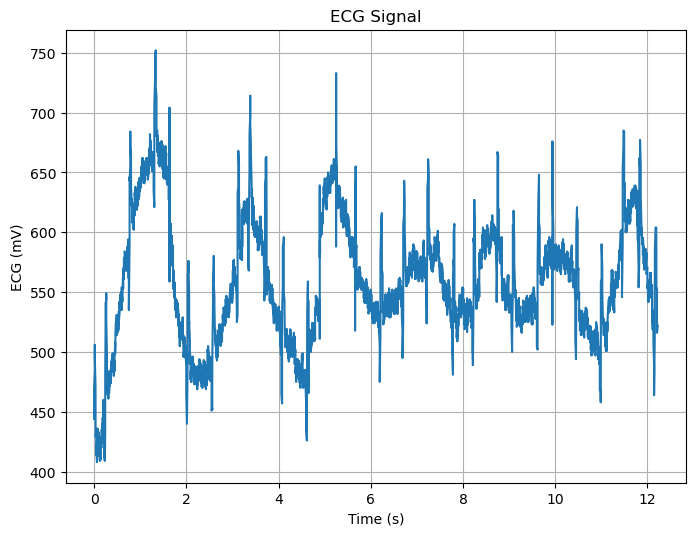

In [1]:
import serial.tools.list_ports
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.signal import savgol_filter
from scipy.signal import argrelextrema
import time
from scipy.signal import butter, lfilter
import neurokit2 as nk
from ecgdetectors import Detectors
import pandas as pd
import heartpy as hp
from heartpy.datautils import rolling_mean
from scipy.interpolate import interp1d
import wfdb
from wfdb import processing
import scipy.signal as sig
import math
import scipy.signal as scs
import peakutils
from numpy import genfromtxt
from scipy.signal import find_peaks
from scipy.signal import butter,filtfilt
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
import serial.tools.list_ports
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.signal import savgol_filter
from scipy.signal import argrelextrema
import time
from scipy.signal import butter, lfilter
import neurokit2 as nk
from ecgdetectors import Detectors
import pandas as pd
import heartpy as hp
from heartpy.datautils import rolling_mean
from scipy.interpolate import interp1d
import wfdb
from wfdb import processing
import scipy.signal as sig
import math
import scipy.signal as scs
import peakutils
from scipy.signal import find_peaks

namer="My_new_ECG_data_Mi109and106bpm_Manual108.996bpm.csv"


daty = genfromtxt(namer, delimiter=',')

init=1
explode=daty.shape[0]
ecg_ref_data=daty[init:explode,1]
ecg=ecg_ref_data
timer=daty[1:(explode-init)+1,2]
inst_fs=1/np.diff(timer)
inst_fs[inst_fs > 175000] = 0


segment_length=3000
err_record=[]
for i in range(len(inst_fs)-segment_length+1):
    temp_inst_fs=inst_fs[i:i+segment_length]
    err_record.append(np.std(temp_inst_fs))

val, idx = min((val, idx) for (idx, val) in enumerate(err_record))

init=idx
explode=idx+segment_length
ecg_ref_data=daty[init:explode,1]
ecg=ecg_ref_data
timer=daty[1:(explode-init)+1,2]
inst_fs=1/np.diff(timer)
inst_fs[inst_fs > 175000] = 0


fs_mean=np.mean(inst_fs)
fs_std=np.std(inst_fs)
fs = (np.mean(inst_fs)*6)
# fs=(fs_std)/3+fs_mean
length=11
order=7
length2=11
order2=7
detrended_ecg=signal.detrend(ecg)
denoised_detrended_ecg=savgol_filter(detrended_ecg,length, order)
def butter_highpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = signal.butter(order, normal_cutoff, btype='high', analog=False)
    return b, a

b, a = butter_highpass(14/60, 10, order=2)
final_ecg = signal.filtfilt(b, a, denoised_detrended_ecg)
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=100)
plt.plot(timer,ecg)
plt.xlabel('Time (s)')
plt.ylabel('ECG (mV)')
plt.title('ECG Signal')
plt.grid()



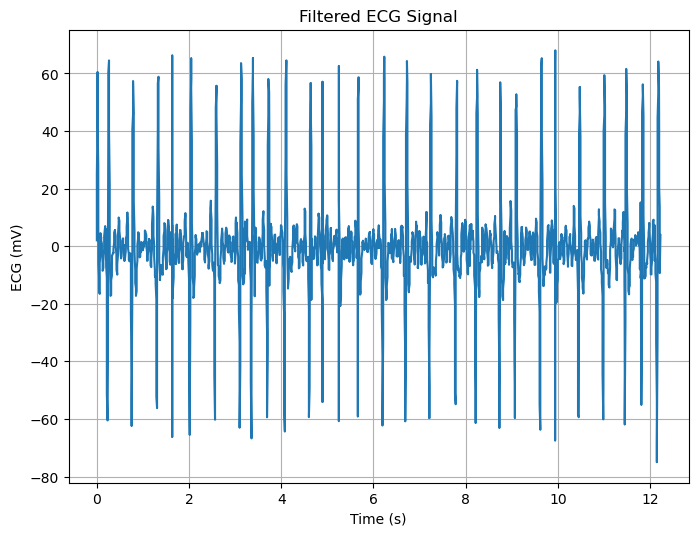

In [2]:
figure(figsize=(8, 6), dpi=100)
plt.plot(timer,final_ecg)
plt.xlabel('Time (s)')
plt.ylabel('ECG (mV)')
plt.title('Filtered ECG Signal')
plt.grid()

Distrubution of Sampling Frequency

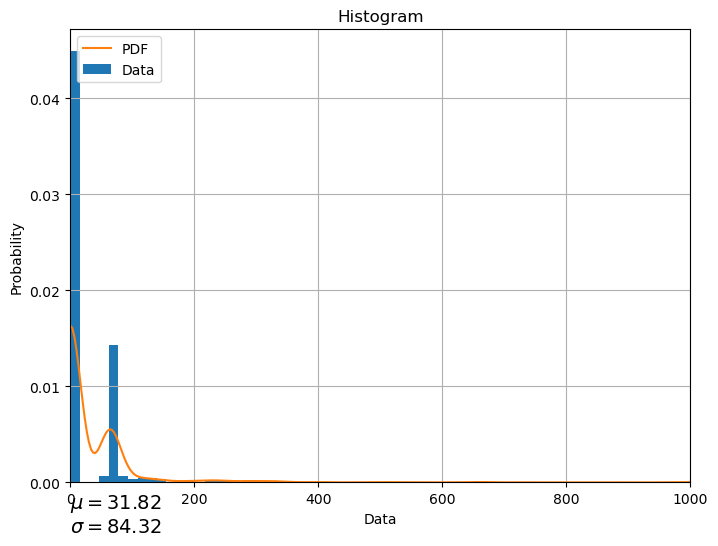

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
import scipy.stats as st
figure(figsize=(8, 6), dpi=100)

plt.hist(inst_fs, density=True, bins=100, label="Data")
# fs_mean=np.mean(inst_fs)
# fs_std=np.std(inst_fs)
fs_median=np.median(inst_fs)
mn=0
mx=1000
plt.xlim(mn, mx)
kde_xs = np.linspace(mn, mx, 300)
kde = st.gaussian_kde(inst_fs)
plt.plot(kde_xs, kde.pdf(kde_xs), label="PDF")
plt.legend(loc="upper left")
plt.ylabel("Probability")
plt.xlabel("Data")
plt.title("Histogram")
textstr = '\n'.join((
    r'$\mu=%.2f$' % (fs_mean, ),
    r'$\sigma=%.2f$' % (fs_std, )))
plt.text(0.0, -0.001, textstr, fontsize=14,
        verticalalignment='top')
plt.grid()

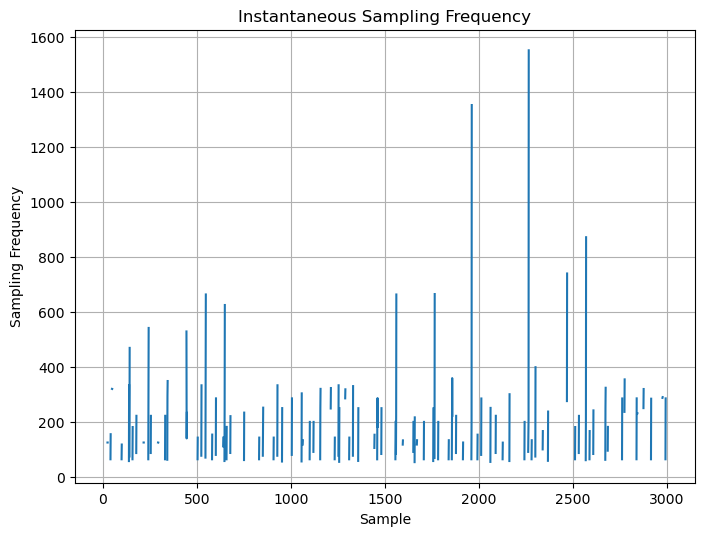

In [4]:
figure(figsize=(8, 6), dpi=100)
plt.plot(1/np.diff(timer))
plt.xlabel('Sample')
plt.ylabel('Sampling Frequency')
plt.title('Instantaneous Sampling Frequency')
plt.grid()

Method #01: Heartpy library automation

c:\Users\junaid\Anaconda3\lib\site-packages\heartpy\visualizeutils.py:119: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


107.20901570735988

<Figure size 7920x7200 with 0 Axes>

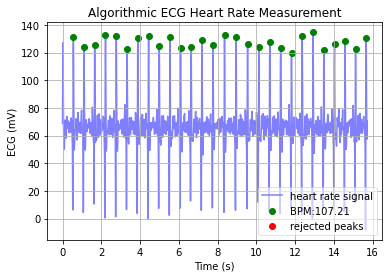

In [5]:
# https://github.com/paulvangentcom/heartrate_analysis_python/blob/master/examples/2_regular_ECG/Analysing_a_regular_ECG_signal.ipynb

wd, m = hp.process(final_ecg, sample_rate = fs)
plt.figure(figsize=(110, 100))
hp.plotter(wd, m)
plt.xlabel('Time (s)')
plt.ylabel('ECG (mV)')
plt.title('Algorithmic ECG Heart Rate Measurement')
plt.grid()

m['breathingrate']
m['bpm']


Method#02: Rambo Style R-peak detection

Heart Rate:  138.1450144617971


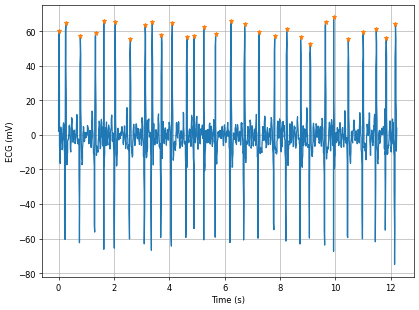

In [6]:
# #  https://www.mathworks.com/matlabcentral/mlc-downloads/downloads/submissions/53983/versions/5/previews/html/ExampleECGBitalino.html

reduced_final_ecg=np.copy(final_ecg)
for i in range(len(reduced_final_ecg)):
    if reduced_final_ecg[i]<=np.mean(reduced_final_ecg)+3*np.std(reduced_final_ecg):
        reduced_final_ecg[i]=0

        
maxIndices=argrelextrema(reduced_final_ecg, np.greater)
maxIndices=np.squeeze(maxIndices,axis=0)
msPerBeat = np.mean(np.diff(timer[maxIndices]))
rheartRate =1/(msPerBeat)*60
print('Heart Rate: ',rheartRate)

figure(figsize=(8, 6), dpi=60)
plt.plot(timer,final_ecg)
plt.ylabel('ECG (mV)')
plt.xlabel('Time (s)')
plt.plot(timer[maxIndices], final_ecg[maxIndices],'*')
plt.grid()

Method#03: R-peak detection based BPM

Heart Rate:  107.17510036257565


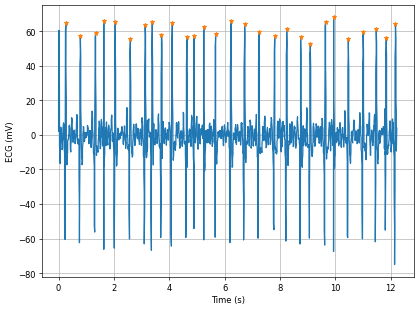

In [7]:
#https://github.com/neuropsychology/NeuroKit

rpeaks, info = nk.ecg_peaks(final_ecg, sampling_rate=fs)
ecg_rate = nk.ecg_rate(rpeaks, sampling_rate=fs, desired_length=len(final_ecg))
my_hrater=np.mean(ecg_rate)
print('Heart Rate: ',my_hrater)

figure(figsize=(8, 6), dpi=60)
plt.plot(timer,final_ecg)
plt.ylabel('ECG (mV)')
plt.xlabel('Time (s)')
plt.plot(timer[info['ECG_R_Peaks']], final_ecg[info['ECG_R_Peaks']],'*')
plt.grid()

Method#04: Pan Tompkins_detector based heart rate

Heart Rate:  110.32923538064952


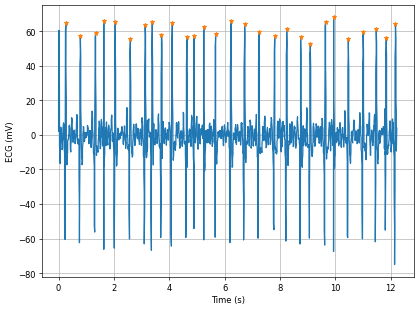

In [8]:
# https://neurokit2.readthedocs.io/en/latest/functions.html
# https://pypi.org/project/py-ecg-detectors/
framized_ecg = pd.DataFrame(final_ecg, columns = ['ECG'])
detectors = Detectors(fs)
r_peaks_pan = detectors.pan_tompkins_detector(framized_ecg.iloc[:,0])
r_peaks_pan= np.asarray(r_peaks_pan)
ecg_rate = nk.ecg_rate(r_peaks_pan, sampling_rate=fs, desired_length=len(final_ecg))
my_hrater=np.mean(ecg_rate)
print('Heart Rate: ',my_hrater)

figure(figsize=(8, 6), dpi=60)
plt.plot(timer,final_ecg)
plt.ylabel('ECG (mV)')
plt.xlabel('Time (s)')
plt.plot(timer[info['ECG_R_Peaks']], final_ecg[info['ECG_R_Peaks']],'*')
plt.grid()

Method#05: R-peak difference and square difference strategy

In [9]:
# https://python-heart-rate-analysis-toolkit.readthedocs.io/en/latest/heartpy.analysis.html
framized_ecg = pd.DataFrame(final_ecg, columns = ['ECG'])
detectors = Detectors(fs)
r_peaks_pan = detectors.pan_tompkins_detector(framized_ecg.iloc[:,0])
peaklister= np.asarray(r_peaks_pan)
wd = hp.analysis.calc_rr(peaklister, sample_rate = fs)
rr_list=wd['RR_list']
my_interpeaks_ind=[i[0] for i in (wd['RR_indices'])]
my_interpeaks_ind=np.array(my_interpeaks_ind)
rr_diff = np.diff(rr_list)
rr_sqdiff = np.power(rr_diff, 2)
wd, m = hp.analysis.calc_ts_measures(rr_list, rr_diff, rr_sqdiff)
rheartRate_noob=m['bpm']
print('Heart Rate: ',rheartRate_noob)


Heart Rate:  109.56358849299797


Method#06: CWT based

In [10]:
#https://github.com/maltintas45/Heart-Rate-from-ECG/blob/master/BPM.ipynb

def calculateBPM(dfA,fs, T=6):
    
# as input, dfA is a dataframe with two column; ECG and time(seconds)
# this function returns the BPMs for seconds
    BPMs=[]
    frequence=int(fs)
    for k in range(int(dfA.shape[0]/frequence)-T+1):
        df=dfA[k*frequence:(k+T)*frequence]
        sig  = df['ECG']
        widths = np.arange(1, 2)
        cwtmatr = signal.cwt(sig, signal.ricker, widths)
        square_cwt_c0=[v**2 for v in cwtmatr[0].tolist()]
        threshold=np.mean(square_cwt_c0)
        marks=[]
        for i,v in enumerate(square_cwt_c0):
            if v>threshold:
                marks.append((k*frequence)+i)
        peaks=[]
        beats=0
        #print marks, df['ECG']
        for i,m in enumerate(marks):
            #print i
            if i==0 or i==len(marks)-1:
                continue
            if df['ECG'][marks[i-1]]<df['ECG'][m] and df['ECG'][marks[i+1]]<df['ECG'][m]: 
                peaks.append(m)
                beats+=1
        
        #print 'for ',k,'. second;',str(beats)," beats in ",str(max(df['time'])-min(df['time'])), "seconds" 
        BPMs.append(beats*(60/T))
    return BPMs

df = pd.DataFrame({'time':timer})
df['ECG'] = final_ecg
BPMs = calculateBPM(df,fs,T=15)
print("Heart Rate : ",sum(BPMs)/len(BPMs))

Heart Rate :  120.0


Method#07:  Scaling based

In [11]:
#https://github.com/johnathanfernandes/ECG-heart-rate-calculator
Mer=max(final_ecg)
scale_factor=1.5/Mer
scaled_signal=final_ecg*scale_factor
count=0
for k in range(2,len(scaled_signal)-1):
    if (scaled_signal[k]> 0.6 and scaled_signal[k]>scaled_signal[k-1] and scaled_signal[k]>scaled_signal[k+1]):
        count=count+1


Ner= len(scaled_signal)
duration=Ner/(fs*60)
BPMer=count/duration

print("Heart Rate: ",BPMer)

Heart Rate:  110.73632468094152


Method#08: Smoothing window based correct peak detection

In [12]:
# https://github.com/MIT-LCP/wfdb-python


# Use the gqrs algorithm to detect qrs locations in the first channel
qrs_inds = processing.gqrs_detect(sig=final_ecg, fs=fs)

# Correct the peaks shifting them to local maxima
min_bpm = 20
max_bpm = 230
#min_gap = record.fs * 60 / min_bpm
# Use the maximum possible bpm as the search radius
search_radius = int(fs * 60 / max_bpm)
corrected_peak_inds = processing.correct_peaks(ecg, peak_inds=qrs_inds,
                                                search_radius=search_radius, smooth_window_size=150)


hrs = processing.compute_hr(sig_len=ecg.shape[0], qrs_inds=sorted(corrected_peak_inds), fs=fs)

heart_rate_raw = np.array([x for x in hrs if str(x) != 'nan'])
heart_rater=np.mean(heart_rate_raw)
print("Heart Rate: ",heart_rater)

Heart Rate:  107.123566


Method#09: Sombero filter based R-peak detection

In [13]:
# https://github.com/pantos98/ECG_analysis_python/blob/main/hr_calc_method.py
# https://github.com/kaseykwong/bme590hrm/blob/master/process_data.py

"""
Filter the ecg with a sombrero low pass filter.
"""
b1 = [-7.757327341237223e-5,  -2.357742589814283e-4, -6.689305101192819e-4, -0.001770119249103, \
        -0.004364327211358, -0.010013251577232, -0.021344241245400, -0.042182820580118, -0.077080889653194, \
        -0.129740392318591, -0.200064921294891, -0.280328573340852, -0.352139052257134, -0.386867664739069, \
            -0.351974030208595, -0.223363323458050, 0, 0.286427448595213, 0.574058766243311, \
        0.788100265785590, 0.867325070584078, 0.788100265785590, 0.574058766243311, 0.286427448595213, 0, \
        -0.223363323458050, -0.351974030208595, -0.386867664739069, -0.352139052257134, \
        -0.280328573340852, -0.200064921294891, -0.129740392318591, -0.077080889653194, -0.042182820580118, \
        -0.021344241245400, -0.010013251577232, -0.004364327211358, -0.001770119249103, -6.689305101192819e-04, \
        -2.357742589814283e-04, -7.757327341237223e-05]

filt_ecg = sig.filtfilt(b1,1,final_ecg)

voltage = ecg


mov_avg = filt_ecg 
avg_hr = (np.mean(voltage))
if avg_hr < 0 and abs(np.min(filt_ecg)) - abs(avg_hr) > abs(np.max(filt_ecg)) - abs(avg_hr):
    voltage = voltage + abs(avg_hr)+abs(np.min(filt_ecg))

mov_avg = [avg_hr if math.isnan(x) else x for x in mov_avg]
window = []
peaklist = []
listpos = 0
for datapoint in voltage:
    rollingmean = mov_avg[listpos]
    if (datapoint < rollingmean) and (len(window) < 1):
        listpos += 1
    elif (datapoint > rollingmean):
        window.append(datapoint)
        listpos += 1
        if (listpos >= len(voltage)):
            beatposition = listpos - len(window) + \
                        (window.index(max(window)))
            peaklist.append(beatposition)
            window = []
    else:
        beatposition = listpos - len(window) + \
                    (window.index(max(window)))
        peaklist.append(beatposition)
        window = []
        listpos += 1


RR_list = []
cnt = 0
while (cnt < (len(peaklist) - 1)):
    RR_interval = (peaklist[cnt + 1] - peaklist[cnt])
    ms_dist = ((RR_interval / fs) * 1000.0)
    RR_list.append(ms_dist)
    cnt += 1

rr_diff = np.diff(RR_list)
rr_sqdiff = np.power(rr_diff, 2)
wd, m = hp.analysis.calc_ts_measures(RR_list, rr_diff, rr_sqdiff)
rheartRate_noob=m['bpm']
print("Heart Rate: ",rheartRate_noob)


Heart Rate:  122.23255072806323


Method#10: Low-High Pass and Derivative Strategy

In [14]:
# https://github.com/ptuduj/ECG-signal-processing/blob/master/ECG_project.ipynb

ecg_signal=final_ecg
ecg_signal = ecg_signal-np.mean(ecg_signal)
ecg_signal = ecg_signal / max(abs(ecg_signal)) # normalize to one
samples_num=len(ecg_signal)
dcblock = np.zeros(samples_num)
for index in range(samples_num):
    if index >= 1:
        dcblock[index] = ecg_signal[index] - ecg_signal[index-1] + 0.995*dcblock[index-1]

dcblock = dcblock/ max(abs(dcblock))  # normalize to one

#low pass filter
# y(nT) = 2y(nT - T) - y(nT - 2T) + x(nT) - 2x(nT - 6T) + x(nT - 12T) 
lowpass = np.zeros(samples_num)
for index in range(samples_num):
    if index >= 1:
        lowpass[index] += 2*lowpass[index-1]
    if index >= 2:
        lowpass[index] -= lowpass[index-2]
    lowpass[index] += dcblock[index]
    if index >= 6:
        lowpass[index] -= 2*dcblock[index-6]
    if index >=12:
        lowpass[index] += dcblock[index-12]

lowpass = lowpass/ max(abs(lowpass))  # normalize to one

#high pass
# y(nT) = 32x(nT - 16T) - [y(nT - T) + x(nT) - x(nT - 32T)]
highpass = np.zeros(samples_num)
for index in range(samples_num):
    if index >= 16:
        highpass[index] += 32 * lowpass[index-16]
    if index >= 1:
        highpass[index] -= highpass[index-1]
    highpass[index] = -lowpass[index]
    if index >= 32:
        highpass[index] += lowpass[index-32]

highpass = highpass/ max(abs(highpass))       # normalize to one

#derivative
#y(nT) = 1/8 [−x(nT − 2T) − 2x(nT − T) + 2x(nT + T) + x(nT + 2T)]
d_signal = np.zeros(samples_num)
for index in range(samples_num):
    if index >= 2:
        d_signal[index] -= highpass[index-2]
    if index >= 1:
        d_signal[index] -= 2 * highpass[index-1]

    if index <= samples_num - 1 - 1:
        d_signal[index] += 2 * highpass[index+1]
    if index <= samples_num - 2 - 1:
        d_signal[index] += highpass[index+2]
    d_signal[index] /= 8
    
d_signal = d_signal/ max(abs(d_signal))  # normalize to one


# square signal
s_signal = np.square(d_signal)
s_signal = s_signal/ max(abs(s_signal))  # normalize to one

#moving average
#y(nT) = (1/N)[x(nT - (N - 1)T) + x(nT - (N - 2)T) + ... x(nT)]
m_signal = (np.convolve(s_signal, np.ones((np.around(0.150 * fs).astype(int))) / np.around(0.15 * fs)))
m_signal = m_signal/ max(abs(m_signal)); # normalize to one


peak_locs = scs.find_peaks_cwt(m_signal, widths=np.arange(1, 50), min_length=np.around(0.1 * fs))
peak_locs_fin = []
for pl in peak_locs:
    tmp_sig = m_signal[pl-50:min(pl + 50, len(m_signal))]
    ind = np.argmax(tmp_sig)
    peak_locs_fin.append(pl - 50 + ind)

max_val = np.max(list(map(lambda x: m_signal[x],peak_locs_fin)))
treshold =0.2* max_val
peak_final_final = np.array(list(filter(lambda x: m_signal[x] > treshold , peak_locs_fin)))

#calculate heart rate
timing =(len(m_signal)-1)/fs # in sec
r_pick_count = len(peak_final_final)
hearthrate= r_pick_count/timing*60
print("Heart Rate: ",hearthrate)

Heart Rate:  109.748587394392


Method#11: R-peak interval based

In [15]:
# https://github.com/haerynkim/bme590hrm/tree/master/functions

def find_peak(corr, thres=0.5, min_dist=0.1):
    cb = np.array(corr)
    beatidx = peakutils.indexes(cb, thres, min_dist)
    num_beats = len(beatidx)
    return beatidx, num_beats


voltage = final_ecg
peakidx, numpeak = find_peak(voltage, thres=0.8, min_dist=105)
peaktimes = timer[peakidx]
rr_int = [t - s for s, t in zip(peaktimes, peaktimes[1:])]
rr_avg = sum(rr_int) / float(len(rr_int))
mean_hr_bpm = (60 / rr_avg)
print("Heart rate: ",mean_hr_bpm)

Heart rate:  105.77210054454142


Method#12: Relatively guided thresholding for peak detection

In [16]:
# https://github.com/durmuselin/heartratedetectionbyusingmatlab/blob/main/ECGHEARTRATE.m

peaks, ind = find_peaks(final_ecg, height=1*np.sqrt(np.mean(final_ecg**2)))
beatspermin=len(peaks)/(timer[peaks[-1]]-timer[peaks[0]])*60
print("Heart Rate: ",beatspermin)

Heart Rate:  143.07876497828985


Method#13: Matched Filter based

In [17]:
# https://github.com/Ronald-cons/ECG-HeartRate-Detect/blob/master/hr_detect.py
class FIR_filter:
    def __init__(self, fir_input):
        self.offset = 0
        self.p = 0
        self.coeff = 0
        self.buffer = np.zeros(number_of_taps)
        self.input = fir_input

    def dofilter(self, v):
        #lms update, get tap input power, buffer 
        output = 0
        self.buf_val = self.p + self.offset
        self.buffer[self.buf_val] = v
        while self.buf_val >= self.p:
            output += (self.buffer[self.buf_val] * self.input[self.coeff])
            self.buf_val = self.buf_val - 1
            self.coeff = self.coeff + 1

        self.buf_val = self.p + number_of_taps - 1

        while self.coeff < number_of_taps:
            output += (self.buffer[self.buf_val] * self.input[self.coeff])
            self.buf_val = self.buf_val - 1
            self.coeff = self.coeff + 1

        self.offset = self.offset + 1

        if self.offset >= number_of_taps:
            self.offset = 0

        self.coeff = 0
        return output

def filterShift(f0,f1,f2):
    #filter inlcudes band stop (to remove 50hz) and high pass (to remove DC)
    fir_f_resp = np.ones(number_of_taps)
    #---------------band stop-------------------------------
    fir_f_resp[int((f1 / fs) * number_of_taps):int((f2 / fs) * number_of_taps) + 1] = 0
    fir_f_resp[number_of_taps - int((f2 / fs) * number_of_taps):number_of_taps - int((f1 / fs) * number_of_taps) + 1] = 0 #do mirror
    #---------------low stop (high pass)-------------------------
    fir_f_resp[0:int((f0 / fs) * number_of_taps) + 1] = 0
    fir_f_resp[number_of_taps - int((f0 / fs) * number_of_taps):number_of_taps] = 0 #do mirror

    fir_t = np.fft.ifft(fir_f_resp) #frequency response to time
    h_real = np.real(fir_t) #time real ~ casual
    h_shifted = np.zeros(number_of_taps)
    h_shifted[0:int(number_of_taps / 2)] = h_real[int(number_of_taps / 2):number_of_taps]
    h_shifted[int(number_of_taps / 2):number_of_taps] = h_real[0:int(number_of_taps / 2)]
    return h_shifted

class matched_filter(FIR_filter):
    def __init__(self, ecg_input):
        self.input = ecg_input
    def Rpeak_detection(self, template, oringin):
        fir_coeff = template[::-1]
        detected_array = np.zeros(len(oringin))
        fir_template = FIR_filter(fir_coeff)
        for i in range(len(oringin)):
            detected_array[i] = np.real(fir_template.dofilter(self.input[i]))
        detected_output = detected_array * detected_array  # The signal is squared to improve the output
        return detected_output

class generateTemplate:
    def __init__(self):
        self

    def mexicanhat(self):
        t = np.linspace(-2, 2, 500) #in the range of taps
        temp = (2 / np.sqrt(3 * 35) * np.pi ** (1 / 4)) * \
                    (1 - (t ** 2 / 35 ** 2)) * np.exp((-t ** 2) / (2 * 35 ** 2))
        return temp

    def gaussian1OD(self):
        t = np.linspace(-2, 2, 500)
        temp = -t * np.exp((-t ** 2) / 50) / (125 * np.sqrt(2 * np.pi))
        return temp

    def gaussian(self):
        t = np.linspace(-2, 2, 500)
        temp = np.exp((-t ** 2) / 50) / (5 * np.sqrt(2 * np.pi))
        return temp

    def shannon(self):
        t = np.linspace(-2, 2, 500)
        temp = np.sqrt(100) * np.sinc(100 * t) * np.exp(2 * 1j * t * np.pi * 4)
        return temp

class detectMomentaryHeartRate:
    def __init__(self, inputlist):
        self.inputlist = inputlist

    def detectMomentaryHeartRate(self,Fs):
        list = self.inputlist  # Output from Matched filter
        BPM = []  # It will be the array of Peaks
        counter = 0  # auxiliary counter
        threshold = max(self.inputlist) * 0.5
        for i in range(len(list)):
            if list[i] > threshold:
                differenceTime = (i - counter)  # difference of time T in second, f = 1/T
                counter = i
                bpm = 1 / differenceTime * (60 * Fs) #1min
                if 200 > bpm > 40:  # Limits for the detection of momentary heart rate
                    BPM.append(bpm)  # Add this peak to the BPM array
        # BPM = np.delete(BPM, 0) #remove
        return BPM

def do_detection(input, Fs, oringin):
    template = generateTemplate()  # Create the class TemplateMaker

    # generate the different templates
    gaussian = template.gaussian()
    devgaussian = template.gaussian1OD()
    shannon = template.shannon()
    mexicanHat = template.mexicanhat()

    # Matching Filtering the R peak of the signal
    calculHeartBeat = matched_filter(input)
    detgaussian = calculHeartBeat.Rpeak_detection(gaussian, oringin)
    det1ODgaussian = calculHeartBeat.Rpeak_detection(devgaussian, oringin)
    detshannon = calculHeartBeat.Rpeak_detection(shannon, oringin)
    detmexicanHat = calculHeartBeat.Rpeak_detection(mexicanHat, oringin)

    #  calculate its coefficients of the matched filter analytically from a mathematical formula
    momentary_heart_rate_gaussian = detectMomentaryHeartRate(detgaussian)
    momentary_heart_rate_gaussian10d = detectMomentaryHeartRate(det1ODgaussian)
    momentary_heart_rate_shannon = detectMomentaryHeartRate(detshannon)
    momentary_heart_rate_mexicanhat = detectMomentaryHeartRate(detmexicanHat)

    # get the result value
    MHRGaussian = momentary_heart_rate_gaussian.detectMomentaryHeartRate(Fs)
    MHRGaussian1OD = momentary_heart_rate_gaussian10d.detectMomentaryHeartRate(Fs)
    MHRShannon = momentary_heart_rate_shannon.detectMomentaryHeartRate(Fs)
    MHRMexicanHat = momentary_heart_rate_mexicanhat.detectMomentaryHeartRate(Fs)
    return MHRShannon


# Define the frequencies coefficients for the FIR filter
f0 = 1  #remove DC
f1 = 55 #Fstop
f2 = 65 #Fpass
# Initialise the script
number_of_taps = 2 #taps

unfilteredSignal = final_ecg  

Shift = filterShift(f0, f1, f2)
a = FIR_filter(Shift)
filteredSignal = np.zeros(len(unfilteredSignal))
#do filter
for i in range(len(unfilteredSignal)):
    filteredSignal[i] = a.dofilter(unfilteredSignal[i])

moment_heartrate = do_detection(filteredSignal, fs, unfilteredSignal)

bpmxx=np.mean(moment_heartrate)

print("Heart rate: ", bpmxx)

Heart rate:  107.97098725459361


Manual Measurement of BPM

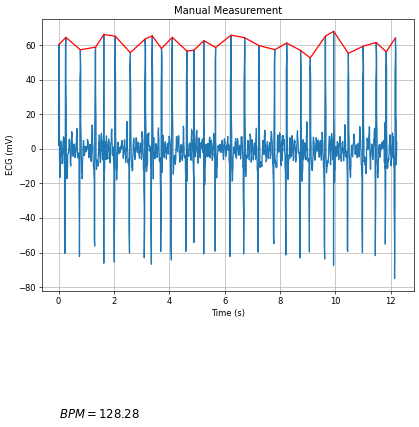

In [18]:
rlocser,_ = find_peaks(final_ecg, distance=70,height=0.5)
rlocs=rlocser
figure(figsize=(8, 6), dpi=60)
# Calculate the heart rate
myheartrate = (len(rlocs)-3)/(timer[rlocs[-1]]-timer[rlocs[0]])*60
plt.plot(timer,final_ecg)
plt.ylabel('Normalized Voltage')
plt.plot(timer[rlocs], final_ecg[rlocs],'r')
# plt.plot(np.zeros_like(denoised_detrended_ecg), "--", color="gray")
plt.title('Manual Measurement')
plt.xlabel('Time (s)')
plt.ylabel('ECG (mV)')
textstr = '\n'.join((
    r'$BPM=%.2f$' % (myheartrate, ),))
plt.text(-0.0, -150, textstr, fontsize=14,
        verticalalignment='top')
plt.grid()
plt.show()